# Moving Average Confluence Zone（ブログ掲載用）

In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# Function to calculate Exponential Moving Averages (EMAs) with reusable parameters
def calculate_emas(df, close_col='Close', periods=None):

    if periods is None:
        periods = [20, 50, 100, 200]  # Default periods if none are provided

    for period in periods:
        df[f'EMA_{period}'] = ta.ema(df[close_col], length=period)
    return df

# Function to detect confluence zone with reusable periods
def detect_confluence(df, periods=None):

    if periods is None:
        periods = [20, 50, 100, 200]  # Default periods if none are provided

    ema_columns = [f'EMA_{period}' for period in periods]
    df['Confluence_Upper'] = df[ema_columns].max(axis=1)
    df['Confluence_Lower'] = df[ema_columns].min(axis=1)
    return df

In [3]:
# Define stock symbol and time period
symbol = '9984.T'
start_date = '2022-01-01'
end_date = '2025-05-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate EMAs with dynamic periods
df = calculate_emas(df, periods=[10, 30, 50, 100])  # Example of custom periods

# Detect Confluence Zone with dynamic periods
df = detect_confluence(df, periods=[10, 30, 50, 100])  # Example of custom periods

# Define Breakout Entry Conditions
df['High_Volume'] = df['Volume'] > df['Volume'].rolling(20).mean() * 1.5  # High volume condition
df['Breakout_Up'] = (df['Close'] > df['Confluence_Upper']) & df['High_Volume']
df['Breakout_Down'] = (df['Close'] < df['Confluence_Lower']) & df['High_Volume']

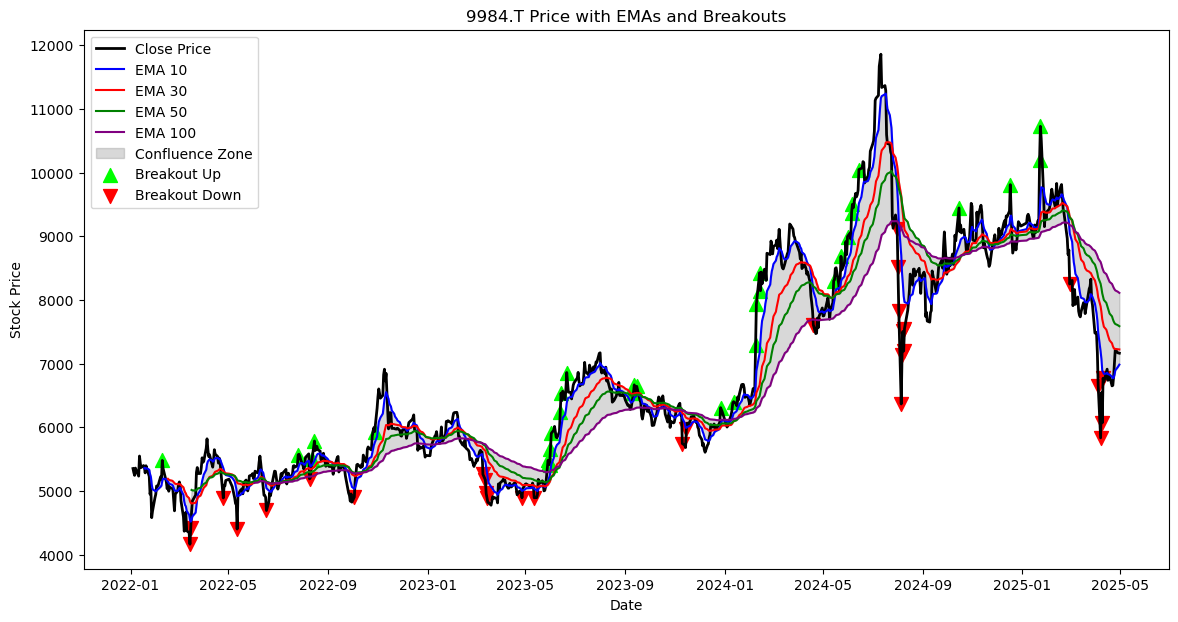

In [5]:
# Function to plot stock data with EMAs, confluence zones, and breakout signals
def plot_stock_chart(df, symbol):
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price
    plt.plot(df.index, df['Close'], label='Close Price', color='black', linewidth=2)
    
    # Plot EMAs
    ema_colors = ['blue', 'red', 'green', 'purple']
    periods = [10, 30, 50, 100]
    for idx, period in enumerate(periods):
        plt.plot(df.index, df[f'EMA_{period}'], label=f'EMA {period}', color=ema_colors[idx])
    
    # Plot Confluence Zone
    plt.fill_between(df.index, df['Confluence_Lower'], df['Confluence_Upper'], 
                     color='gray', alpha=0.3, label='Confluence Zone')
    
    # Highlight Breakout Points
    breakout_up = df[df['Breakout_Up']]
    breakout_down = df[df['Breakout_Down']]
    plt.scatter(breakout_up.index, breakout_up['Close'], marker='^', color='lime', label='Breakout Up', s=100)
    plt.scatter(breakout_down.index, breakout_down['Close'], marker='v', color='red', label='Breakout Down', s=100)
    
    # Labels and Legend
    plt.title(f'{symbol} Price with EMAs and Breakouts')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Plot the chart
plot_stock_chart(df, symbol)